In [5]:

import pandas as pd
import numpy as np

# Create sample data: Study hours vs Exam result (0=fail, 1=pass)
data = {
    'Hours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Pass':   [0, 0, 0, 0, 1, 0, 1, 1, 1, 1]  # 1 means passed
}

df = pd.DataFrame(data)
print(df)

   Hours  Pass
0      1     0
1      2     0
2      3     0
3      4     0
4      5     1
5      6     0
6      7     1
7      8     1
8      9     1
9     10     1


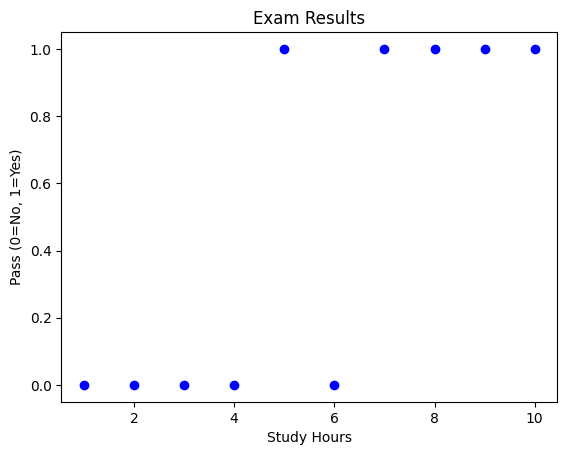

In [6]:
import matplotlib.pyplot as plt

plt.scatter(df['Hours'], df['Pass'], color='blue')
plt.xlabel('Study Hours')
plt.ylabel('Pass (0=No, 1=Yes)')
plt.title('Exam Results')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

X = df[['Hours']]  # Feature (study hours)
y = df['Pass']      # Target (pass/fail)

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Print the learned parameters
print("Intercept (b0):", model.intercept_[0])
print("Coefficient (b1):", model.coef_[0][0])

Intercept (b0): -4.5732010902423035
Coefficient (b1): 0.8314784463286691


In [32]:
# Predict probability of passing for 4 hours of study
prob = model.predict_proba([[4]])[0][1]
print(f"Probability of passing with 4 hours: {prob:.1%}")

# Predict class (pass/fail) for 7 hours
pred = model.predict([[6]])[0]
print(f"Prediction for 7 hours: {'Pass' if pred == 1 else 'Fail'}")

Probability of passing with 4 hours: 22.3%
Prediction for 7 hours: Pass


C:\Users\Best Computers\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Best Computers\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [33]:
from sklearn.metrics import accuracy_score

# Predict on test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.0%}")

Model Accuracy: 100%


C:\Users\Best Computers\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


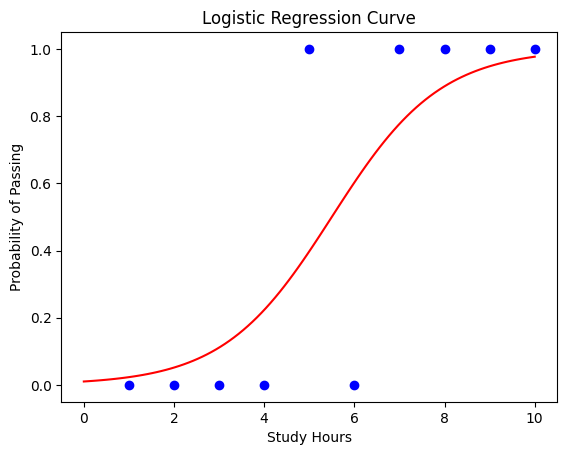

In [34]:
# Create a range of hours
hours_range = np.linspace(0, 10, 100).reshape(-1, 1)

# Get probabilities for each hour
probs = model.predict_proba(hours_range)[:, 1]

# Plot the logistic curve
plt.scatter(df['Hours'], df['Pass'], color='blue')
plt.plot(hours_range, probs, color='red')
plt.xlabel('Study Hours')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression Curve')
plt.show()

In [38]:
# TO PREDICT NEW STUDENT
new_student = [[5.5]]  # 5.5 hours of study
print("Pass probability:", model.predict_proba(new_student)[0][1])
print("Prediction:", model.predict(new_student)[0])

Pass probability: 0.4999825911413511
Prediction: 0


C:\Users\Best Computers\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Best Computers\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [39]:
# Calculate the exact hour where probability = 50%
decision_boundary = -model.intercept_[0]/model.coef_[0][0]
print(f"50% pass probability at: {decision_boundary:.1f} hours")

50% pass probability at: 5.5 hours
